In [127]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
bank = pd.read_csv("Jeux_de_donnees/bank-full.csv", delimiter=";", encoding='latin-1', na_values="unknown")
bank = bank.reset_index()
bank

,index,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


In [87]:
bank = bank.dropna().reset_index()
bank.shape

(7842, 19)

In [88]:
bank

,level_0,index,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,24060,24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
1,24062,24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
2,24064,24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
3,24072,24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
4,24077,24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,45199,45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
7838,45201,45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
7839,45204,45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
7840,45208,45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes


#### Pour les variables catégorieles: -> les transformater 

In [101]:

list_num = ["age", "balance", "day", "duration", "campaign",
            "pdays", "previous"]
list_cat = ["job", "marital", "education", "default", "housing",
               "loan", "contact", "month", "poutcome", "y"]
#mettre la var y en binaire et l'inclure dans le list col numérique (AMELIORATION=
# méthode apply/map/replace

cat_encoder = OneHotEncoder()
#transformer des données
bank_long_1hot = cat_encoder.fit_transform(bank[list_cat])
bank_long_1hot.toarray()

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [105]:
#creer un dataframe disjontion (contient que valeur 0 et 1)
df_list_cat = pd.DataFrame(bank_long_1hot.toarray())
df_list_cat = df_list_cat.reset_index()
df_list_cat

,index,0,1,2,3,4,5,6,7,8,...,32,33,34,35,36,37,38,39,40,41
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,7837,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7838,7838,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7839,7839,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7840,7840,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [103]:
bank_col_num = bank[list_num]
bank_col_num = bank_col_num.reset_index()
bank_col_num
#normalize des donnees DF

,index,age,balance,day,duration,campaign,pdays,previous
0,0,33,882,21,39,1,151,3
1,1,42,-247,21,519,1,166,1
2,2,33,3444,21,144,1,91,4
3,3,36,2415,22,73,1,86,4
4,4,36,0,23,140,1,143,3
...,...,...,...,...,...,...,...,...
7837,7837,34,1475,16,1166,3,530,12
7838,7838,53,583,17,226,1,184,4
7839,7839,73,2850,17,300,1,40,8
7840,7840,72,5715,17,1127,5,184,3


In [106]:
#merger df bank contenant des cols numériques av tableau disjontion, col de jointure : index
bank_num = pd.merge(bank_col_num, df_list_cat)
#bank_num = pd.concat()

In [107]:
bank_num = bank_num.drop(columns=["index"])
bank_num

,age,balance,day,duration,campaign,pdays,previous,0,1,2,...,32,33,34,35,36,37,38,39,40,41
0,33,882,21,39,1,151,3,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,42,-247,21,519,1,166,1,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,33,3444,21,144,1,91,4,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,36,2415,22,73,1,86,4,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,36,0,23,140,1,143,3,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,34,1475,16,1166,3,530,12,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7838,53,583,17,226,1,184,4,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7839,73,2850,17,300,1,40,8,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7840,72,5715,17,1127,5,184,3,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [108]:
#affection tous de cols en variable X
X = bank_num

In [110]:
k = 3
clustering = KMeans(n_clusters=k, random_state=42)
y_pred = clustering.fit_predict(X)


In [111]:
y_pred
print(len(y_pred))

7842


In [112]:
clustering.cluster_centers_

array([[ 4.33848878e+01,  6.45018300e+03,  1.50708383e+01,
         2.92407320e+02,  2.09445100e+00,  1.92185360e+02,
         3.33293979e+00,  1.01534829e-01,  1.44037780e-01,
         1.53482881e-02,  2.47933884e-02,  3.09327037e-01,
         9.32703660e-02,  3.06965762e-02,  6.96576151e-02,
         3.30578512e-02,  1.49940968e-01,  2.83353011e-02,
         1.01534829e-01,  6.21015348e-01,  2.77449823e-01,
         1.27508855e-01,  4.32113341e-01,  4.40377804e-01,
         1.00000000e+00,  3.12250226e-17,  4.61629280e-01,
         5.38370720e-01,  9.33884298e-01,  6.61157025e-02,
         8.97284534e-01,  1.02715466e-01,  1.39315230e-01,
         7.31995277e-02,  2.24321133e-02,  6.96576151e-02,
         2.83353011e-02,  3.54191263e-02,  4.36835891e-02,
         2.95159386e-02,  2.25501771e-01,  2.24321133e-01,
         6.25737898e-02,  4.60448642e-02,  5.76151122e-01,
         2.04250295e-01,  2.19598583e-01,  7.15466352e-01,
         2.84533648e-01],
       [ 4.04276249e+01,  7.75

In [113]:
print(len(clustering.cluster_centers_[0]))

49


In [114]:
bank_num["predict"] = y_pred

In [115]:
bank_num.head()

,age,balance,day,duration,campaign,pdays,previous,0,1,2,...,33,34,35,36,37,38,39,40,41,predict
0,33,882,21,39,1,151,3,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1
1,42,-247,21,519,1,166,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,33,3444,21,144,1,91,4,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1
3,36,2415,22,73,1,86,4,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
4,36,0,23,140,1,143,3,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1


In [ ]:
#ajouter les gravites au DF
#center = pd.DataFrame(clustering.cluster_centers_, columns=bank_num.columns[:-1])
#center[bank_num.columns[-1]] = -1
#bank_num = bank_num.append(center)



In [ ]:
bank_num.columns[:-1]

Index([     'age',  'balance',      'day', 'duration', 'campaign',    'pdays',
       'previous',          0,          1,          2,          3,          4,
                5,          6,          7,          8,          9,         10,
               11,         12,         13,         14,         15,         16,
               17,         18,         19,         20,         21,         22,
               23,         24,         25,         26,         27,         28,
               29,         30,         31,         32,         33,         34,
               35,         36,         37,         38,         39,         40,
               41],
      dtype='object')

In [ ]:
clustering.inertia_

13285656744.923212

# comparer av d'autre inertie

In [ ]:
#score silhouette

In [94]:
bank_num.shape

(7846, 50)

Essayer de tester pls possibilités avec nb clusters différences

In [116]:
from sklearn.metrics import silhouette_score

cluster = [i for i in range(2,11)]
inertie = []
silouette = []

for i in cluster:
    k = i
    clustering = KMeans(n_clusters=k, random_state=42)
    clustering.fit(X)
    
    inertie.append(clustering.inertia_)
    silouette.append(silhouette_score(bank_num, clustering.labels_))

inertie

[36476549907.04859,
 20725475803.770348,
 13285657053.950874,
 7989370148.571279,
 5503170061.693215,
 4236678208.088158,
 3472328598.690324,
 2907255446.878989,
 2407022497.9943566]

<AxesSubplot:xlabel='cluster', ylabel='inertie'>

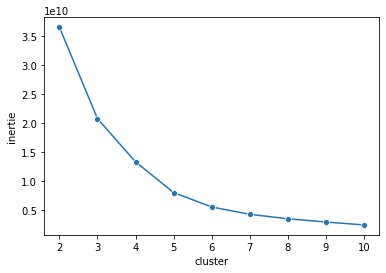

In [117]:
data = pd.DataFrame({'cluster':cluster, 'inertie':inertie})
sns.lineplot(data=data, x="cluster", y="inertie", marker='o')

<AxesSubplot:xlabel='cluster', ylabel='silouette'>

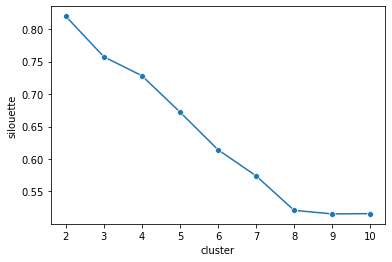

In [118]:
data = pd.DataFrame({'cluster':cluster, 'silouette':silouette})
sns.lineplot(data=data, x="cluster", y="silouette", marker='o')

# Traiter des données avant d'appliquer kmean

In [132]:
bank1 = pd.read_csv("Jeux_de_donnees/bank-full.csv", delimiter=";", encoding='latin-1', na_values="unknown")
bank1 = bank1.dropna().reset_index(drop=True)
bank1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
1,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
2,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
3,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
4,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
7838,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
7839,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
7840,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes


In [126]:
bank1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [133]:
#remplace valeur du col default: yes par 1 et no par 0
col_remplace = ["default", "housing", "loan", "y" ]

for col in col_remplace : 
    bank1[col].replace({"yes": 1, "no": 0}, inplace=True)
    #bank1[col] = bank1[col].apply(lambda x: 1 if x=="yes" else 0)


bank1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,33,admin.,married,tertiary,0,882,0,0,telephone,21,oct,39,1,151,3,failure,0
1,42,admin.,single,secondary,0,-247,1,1,telephone,21,oct,519,1,166,1,other,1
2,33,services,married,secondary,0,3444,1,0,telephone,21,oct,144,1,91,4,failure,1
3,36,management,married,tertiary,0,2415,1,0,telephone,22,oct,73,1,86,4,other,0
4,36,management,married,tertiary,0,0,1,0,telephone,23,oct,140,1,143,3,failure,1


In [137]:
mois = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
bank1["month"] = bank1["month"].apply(lambda x: mois.index(x))
bank1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,33,admin.,married,tertiary,0,882,0,0,telephone,21,9,39,1,151,3,failure,0
1,42,admin.,single,secondary,0,-247,1,1,telephone,21,9,519,1,166,1,other,1
2,33,services,married,secondary,0,3444,1,0,telephone,21,9,144,1,91,4,failure,1
3,36,management,married,tertiary,0,2415,1,0,telephone,22,9,73,1,86,4,other,0
4,36,management,married,tertiary,0,0,1,0,telephone,23,9,140,1,143,3,failure,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,34,blue-collar,single,secondary,0,1475,1,0,cellular,16,10,1166,3,530,12,other,0
7838,53,management,married,tertiary,0,583,0,0,cellular,17,10,226,1,184,4,success,1
7839,73,retired,married,secondary,0,2850,0,0,cellular,17,10,300,1,40,8,failure,1
7840,72,retired,married,secondary,0,5715,0,0,cellular,17,10,1127,5,184,3,success,1


In [140]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7842 entries, 0 to 7841
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        7842 non-null   int64 
 1   job        7842 non-null   object
 2   marital    7842 non-null   object
 3   education  7842 non-null   object
 4   default    7842 non-null   int64 
 5   balance    7842 non-null   int64 
 6   housing    7842 non-null   int64 
 7   loan       7842 non-null   int64 
 8   contact    7842 non-null   object
 9   day        7842 non-null   int64 
 10  month      7842 non-null   int64 
 11  duration   7842 non-null   int64 
 12  campaign   7842 non-null   int64 
 13  pdays      7842 non-null   int64 
 14  previous   7842 non-null   int64 
 15  poutcome   7842 non-null   object
 16  y          7842 non-null   int64 
dtypes: int64(12), object(5)
memory usage: 1.0+ MB


In [145]:
atts_num = ["age", "default", "campaign", "balance", "housing", "loan", "duration", "day", "month", "pdays", "previous", "y"]
atts_cat = ["job", "marital", "education"]

cat_encoder = OneHotEncoder()
#transformer des données
bank_long_1hot = cat_encoder.fit_transform(bank1[atts_cat])
bank_long_1hot.toarray()


array([[1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [146]:
df_list_cat1 = pd.DataFrame(bank_long_1hot.toarray())
#df_list_cat1 = df_list_cat.reset_index(inplace=True)
df_list_cat1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7838,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7839,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7840,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [150]:
#concatenate 2 df: df bank contenant des cols numériques, d'un est tableau disjontion
bankfull = pd.concat([bank1[atts_num], df_list_cat1], axis=1)
bankfull

,age,default,campaign,balance,housing,loan,duration,day,month,pdays,...,7,8,9,10,11,12,13,14,15,16
0,33,0,1,882,0,0,39,21,9,151,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,42,0,1,-247,1,1,519,21,9,166,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,33,0,1,3444,1,0,144,21,9,91,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,36,0,1,2415,1,0,73,22,9,86,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,36,0,1,0,1,0,140,23,9,143,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,34,0,3,1475,1,0,1166,16,10,530,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7838,53,0,1,583,0,0,226,17,10,184,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7839,73,0,1,2850,0,0,300,17,10,40,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7840,72,0,5,5715,0,0,1127,17,10,184,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
